## Laptop Price Predictor

The laptop price predictor is a regression model that aims to predict the price of a laptop based on various features such as the laptop's brand, model, processor, graphics card, storage capacity, and other specifications. The model is built using a regression algorithm that analyzes the relationships between the laptop's features and its price, and then uses that information to make predictions about the price of new laptops. The end result is a tool that can help consumers make informed decisions about which laptops to purchase based on their budget and desired features.

### Step 1. Importing Essential Libraries

Libraries like numpy, pandas and matplotlib are important for the correct execution of the project.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Analysing and Visualizing the Data (Data Preprocessing)

To create a better model for our data, understanding the data well is crucial. In this section we will understand as well as visualize our data to check correlations among various columns

In [6]:
df = pd.read_csv("laptop_data.csv")
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [7]:
df.tail(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [8]:
# Let's understand out data better by seeing the summary of various columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [9]:
# Let's check if there are any duplicate rows in the dataframe
df.duplicated().sum()

0

In [10]:
# Let's check for any missing or null values in ur dataframe
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
# Here we don't need the column 'Unnamed'. Let's delete it.
#df.drop( 'Unnamed: 0', axis = 1)
df.drop(columns=["Unnamed: 0"], inplace=True)
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [12]:
# Let's remove the 'GB' part in Ram and 'kg' part in Weight as it will interfere with our training of model
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg','')

In [13]:
df.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [14]:
# Let's convert the datatypes of two columns: 'RAM' and 'Weight'
# RAM datatype will now be int32
# Weight datatype will now be float32
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Count'>

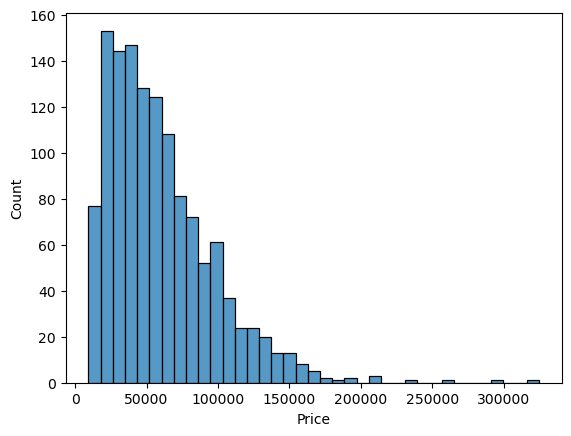

In [16]:
# Let's create a histogram of the distribution of the price variable
sns.histplot(df['Price'])

<Axes: xlabel='Company'>

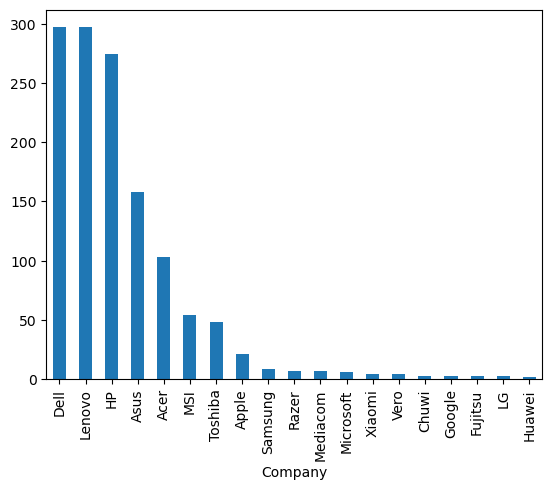

In [17]:
# Let's see the frequency of unique laptop brands in our database using a barplot
df['Company'].value_counts().plot(kind='bar')

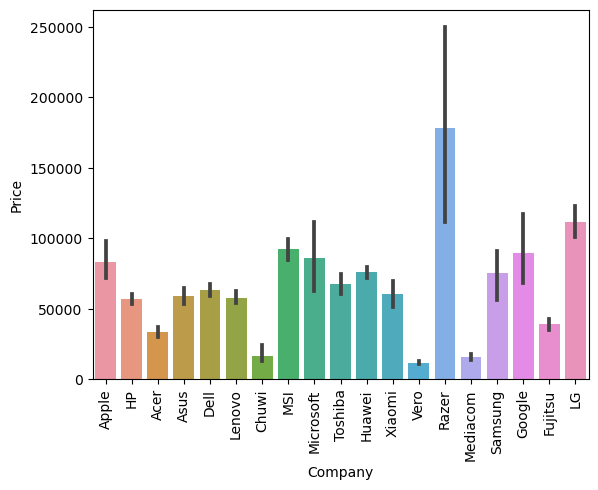

In [18]:
# Let's see the correlation of different laptop brands and price
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

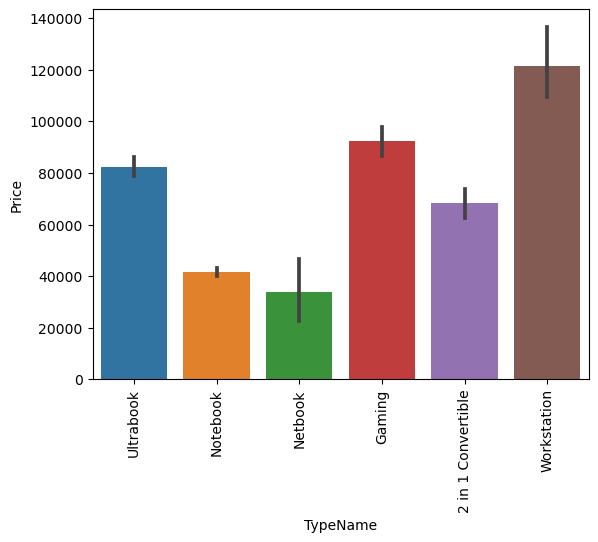

In [19]:
# Let's see the correlation of different laptop types and price
sns.barplot(x=df['TypeName'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

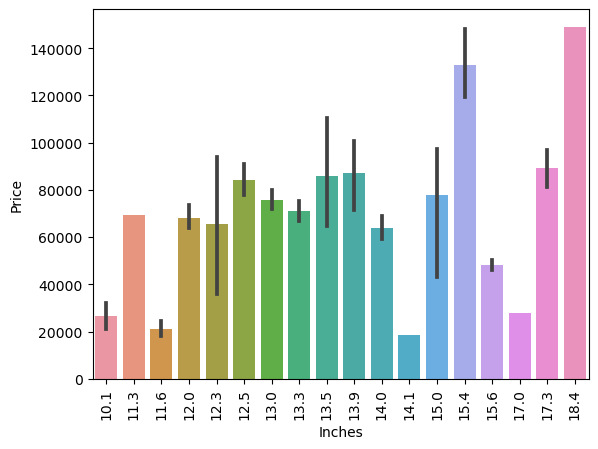

In [20]:
# Let's see the correlation of different laptop screen size(in inches) and price
sns.barplot(x=df['Inches'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [21]:
# Count of unique values in 'Screen Resolution' column
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [22]:
# Let's create a new column called 'Touchscreen' indicating whether a laptop has touchscreen display or not
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [23]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [24]:
df.tail()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.72,1
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.12,0
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0
1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4,500GB HDD,Intel HD Graphics,Windows 10,2.20,19660.32,0


In [25]:
df['TouchScreen'].value_counts()

TouchScreen
0    1111
1     192
Name: count, dtype: int64

<Axes: xlabel='TouchScreen'>

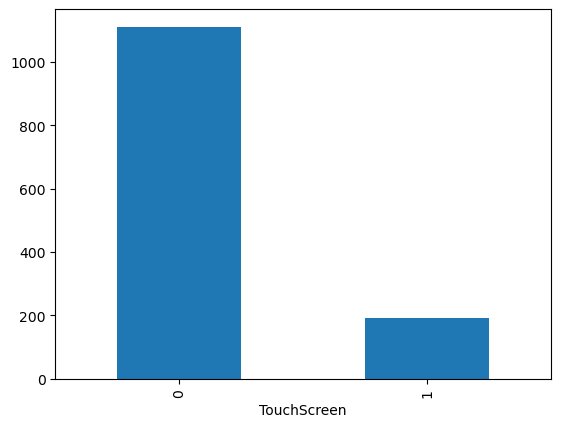

In [26]:
# Barplot of 'Touchscreen' column and their frequency
df['TouchScreen'].value_counts().plot(kind='bar')

In [27]:
# Let's create a new column called 'IPS' indicating whether a laptop has IPS Panel or not
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS Panel' in x else 0)

In [28]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS'>

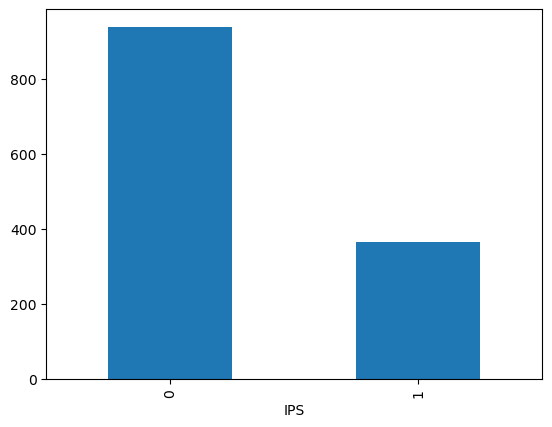

In [29]:
# Barplot of 'Touchscreen' column and their frequency
df['IPS'].value_counts().plot(kind='bar')

In [30]:
df['IPS'].value_counts()

IPS
0    938
1    365
Name: count, dtype: int64

In [31]:
df['ScreenResolution']

0               IPS Panel Retina Display 2560x1600
1                                         1440x900
2                                Full HD 1920x1080
3               IPS Panel Retina Display 2880x1800
4               IPS Panel Retina Display 2560x1600
                           ...                    
1298     IPS Panel Full HD / Touchscreen 1920x1080
1299    IPS Panel Quad HD+ / Touchscreen 3200x1800
1300                                      1366x768
1301                                      1366x768
1302                                      1366x768
Name: ScreenResolution, Length: 1303, dtype: object

In [32]:
# Let's create a variable which splits the 'Screen Resolution' column with 'x' as delimiter
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [33]:
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [34]:
# Let's create two new columns X_res and Y_res to store the x and y resolutions of the screen
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [35]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


We need to extract the digits from the text of the 'X res col'. However, the problem arises because the numbers are scattered within the text. That's why I'm using regular expressions (regex), which allow us to precisely retrieve the numbers we're looking for. Firstly, we replace all the commas with nothing (i.e., remove them). Then, we use the regex pattern '\d+.?\d+' to find all the numbers from that string. Here, '\d+' matches any integer number, '.?' matches any decimal point that may follow, and '\d+' ensures that the string must end with numbers.

\d+: Matches one or more digits.

.?: Matches an optional period (decimal point).

\d+: Matches one or more digits after the decimal point (if present).

This pattern ensures that the extracted string ends with a numerical value.

In [37]:
# Since X_res has unnecessary data let's remove that and only keep the X_res value
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [38]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [39]:
##lets checks the datatypes
print(df.dtypes)

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
TouchScreen           int64
IPS                   int64
X_res                object
Y_res                object
dtype: object


In [40]:
# Convert X_res and Y_res datatype from sting to int
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [41]:
print(df.dtypes)

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
TouchScreen           int64
IPS                   int64
X_res                 int32
Y_res                 int32
dtype: object


In [42]:
# Let's create a new column called PPI 
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [44]:
# Since we no longer need Screen Resolution, Inches, X_res and Y_res; let's delete those rows
df.drop(columns=['ScreenResolution','Inches', 'X_res', 'Y_res'], inplace=True)

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [46]:
# Let's split the data in Cpu column into words
df['Cpu'].apply(lambda x: x.split())

0                         [Intel, Core, i5, 2.3GHz]
1                         [Intel, Core, i5, 1.8GHz]
2                  [Intel, Core, i5, 7200U, 2.5GHz]
3                         [Intel, Core, i7, 2.7GHz]
4                         [Intel, Core, i5, 3.1GHz]
                           ...                     
1298               [Intel, Core, i7, 6500U, 2.5GHz]
1299               [Intel, Core, i7, 6500U, 2.5GHz]
1300    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
1301               [Intel, Core, i7, 6500U, 2.5GHz]
1302    [Intel, Celeron, Dual, Core, N3050, 1.6GHz]
Name: Cpu, Length: 1303, dtype: object

In [47]:
# Let's create a new column CPU Name whoch stores only the first three words of the Cpu column
df['CPU Name'] = df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [48]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [49]:
# This function takes a Cpu name as input ans returns the CPU Brand of it

def fetch_processor(text):
    if text == 'Intel Core i3' or text == 'Intel Core i5' or text == 'Intel Core i7':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [50]:
# Let's create CPU Brand column using the above function
df['CPU_Brand'] = df['CPU Name'].apply(fetch_processor)

In [51]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU Name,CPU_Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


In [52]:
df['CPU_Brand'].value_counts()

CPU_Brand
Intel Core i7            527
Intel Core i5            423
Other Intel Processor    154
Intel Core i3            136
AMD Processor             63
Name: count, dtype: int64

<Axes: xlabel='CPU_Brand'>

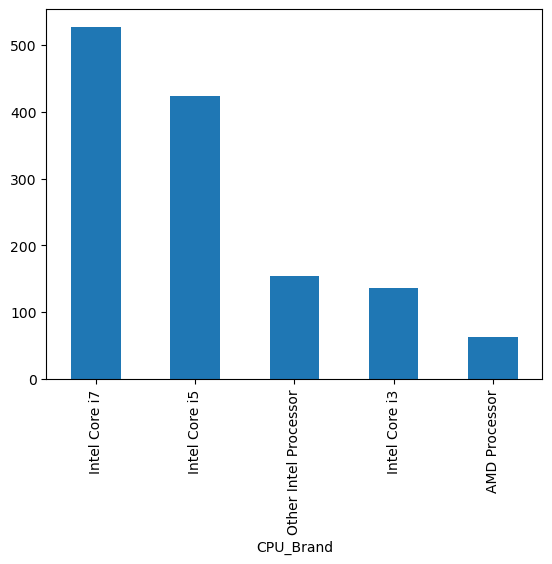

In [53]:
df['CPU_Brand'].value_counts().plot(kind = 'bar')

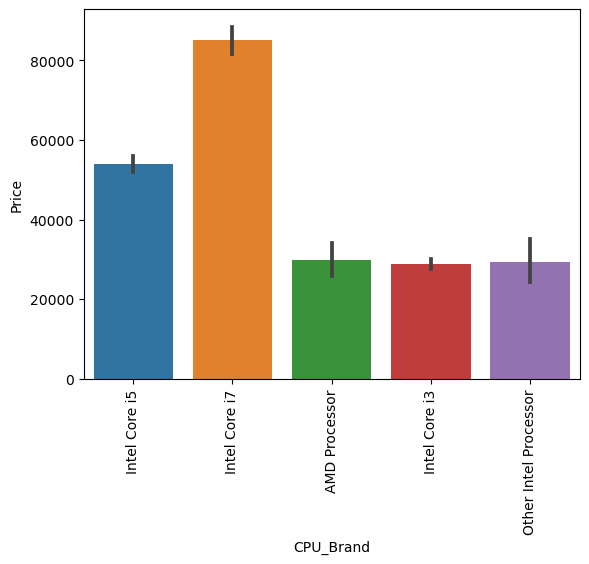

In [54]:
sns.barplot(x=df['CPU_Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df.drop(['Cpu', 'CPU Name'], inplace=True, axis=1)

In [56]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

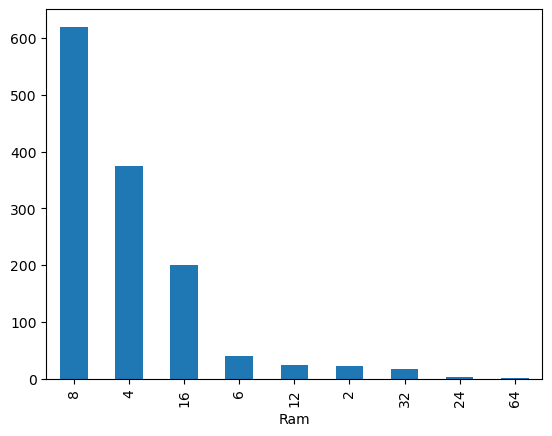

In [57]:
df['Ram'].value_counts().plot(kind='bar')

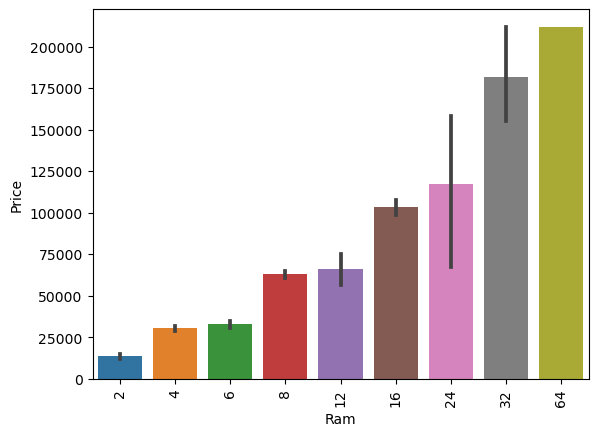

In [58]:
sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [59]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [60]:
##As my observetion we have only 4 verient here in this dataset - SSD,HDD,Flash,Hybrid
##Lets start the pre processing for better insight

## so we have expession like 1.0 TB so I will make the 1.0TB to 1TB
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)

## replace the GB with ''

df['Memory'] = df['Memory'].replace('GB','') ##it means 16GB will be 16 and 256 GB will be 256


##replace 'TB' to to '000' means 1 tb = 1000 gb so its change 1TB = 1000(after replacing )
df['Memory'] = df['Memory'].replace('TB','000')

##split the data where we will find (+) in between text file like 512GB SSD +  2TB HDD
new_df = df['Memory'].str.split('+',n =1,expand = True)   ##['521 SSD','2000 HDD']


In [61]:
new_df.head()

,0,1
0,128GB SSD,None
1,128GB Flash Storage,None
2,256GB SSD,None
3,512GB SSD,None
4,256GB SSD,None


In [62]:
##lets remove the all white spaces

df['Memory1'] = new_df[0]
df['Memory1'] = df['Memory1'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,Memory1
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128GB SSD
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128GB Flash Storage
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256GB SSD
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512GB SSD
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256GB SSD


In [63]:
def changes(value):
  df['L1'+value]=df['Memory1'].apply(lambda x:1 if value in x else 0)


list_apply = ['SSD','HDD','FlashStorage','Hybrid']
for value in list_apply:
  changes(value)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,Memory1,L1SSD,L1HDD,L1FlashStorage,L1Hybrid
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128GB SSD,1,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128GB Flash Storage,0,0,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256GB SSD,1,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512GB SSD,1,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256GB SSD,1,0,0,0


In [64]:
## remove all the charecters from the column just keep only the numbers
df['Memory1'] = df['Memory1'].str.replace(r'\D','')

In [65]:
df['Memory1'].value_counts()

Memory1
256GB SSD              500
1TB HDD                225
128GB SSD              172
512GB SSD              138
500GB HDD              132
32GB Flash Storage      38
64GB Flash Storage      16
2TB HDD                 16
1TB SSD                 16
1TB Hybrid               9
256GB Flash Storage      8
16GB Flash Storage       7
32GB SSD                 6
180GB SSD                5
128GB Flash Storage      4
16GB SSD                 3
512GB Flash Storage      2
240GB SSD                1
8GB SSD                  1
64GB SSD                 1
128GB HDD                1
32GB HDD                 1
508GB Hybrid             1
Name: count, dtype: int64

In [66]:
df['Memory2'] = new_df[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,Memory1,L1SSD,L1HDD,L1FlashStorage,L1Hybrid,Memory2
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128GB SSD,1,0,0,0,None
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128GB Flash Storage,0,0,0,0,None
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256GB SSD,1,0,0,0,None
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512GB SSD,1,0,0,0,None
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256GB SSD,1,0,0,0,None


In [67]:
def changes1(value):
  df['L2'+value]=df['Memory2'].apply(lambda x:1 if value in x else 0)


list_apply1 = ['SSD','HDD','FlashStorage','Hybrid']
df['Memory2']=df['Memory2'].fillna('0')
for value in list_apply1:
  changes1(value)

df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,Memory1,L1SSD,L1HDD,L1FlashStorage,L1Hybrid,Memory2,L2SSD,L2HDD,L2FlashStorage,L2Hybrid
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128GB SSD,1,0,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128GB Flash Storage,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256GB SSD,1,0,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512GB SSD,1,0,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256GB SSD,1,0,0,0,0,0,0,0,0


In [68]:
df['Memory2'] = df['Memory2'].str.replace(r'\D','')
df['Memory2'].value_counts()

Memory2
0               1095
  1TB HDD        185
  2TB HDD         15
  256GB SSD        3
  500GB HDD        2
  1TB Hybrid       2
  512GB SSD        1
Name: count, dtype: int64

In [69]:
##Multiplying elements and storing the elemts in the perticular columns
df['HDD'] = (df['Memory1']*df['L1HDD']+df['Memory2']*df['L2HDD'])

df['SSD'] = (df['Memory1']*df['L1SSD']+df['Memory2']*df['L2SSD'])

df['Hybrid'] =(df['Memory1']*df['L1Hybrid']+df['Memory2']*df['L2Hybrid'])

df['FlashStorage'] = (df['Memory1']*df['L1FlashStorage']+df['Memory2']*df['L2FlashStorage'])

In [70]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,L1Hybrid,Memory2,L2SSD,L2HDD,L2FlashStorage,L2Hybrid,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,0,0,0,0,0,,128GB SSD,,
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,0,0,0,0,0,,,,
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,0,0,0,0,0,,256GB SSD,,
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,0,0,0,0,0,,512GB SSD,,
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,0,0,0,0,0,,256GB SSD,,


In [71]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price', 'TouchScreen', 'IPS', 'PPI', 'CPU_Brand', 'Memory1', 'L1SSD',
       'L1HDD', 'L1FlashStorage', 'L1Hybrid', 'Memory2', 'L2SSD', 'L2HDD',
       'L2FlashStorage', 'L2Hybrid', 'HDD', 'SSD', 'Hybrid', 'FlashStorage'],
      dtype='object')

In [72]:
##droping columns which is not required now
df.drop(columns=['Memory','Memory1', 'L1SSD',
       'L1HDD', 'L1FlashStorage', 'L1Hybrid', 'Memory2', 'L2SSD', 'L2HDD',
       'L2FlashStorage', 'L2Hybrid'],inplace = True)

In [73]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,Hybrid,FlashStorage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128GB SSD,,
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,,
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256GB SSD,,
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512GB SSD,,
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256GB SSD,,


In [74]:
df.tail()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,Hybrid,FlashStorage
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,157.350512,Intel Core i7,,128GB SSD,,
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.72,1,1,276.053530,Intel Core i7,,512GB SSD,,
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.12,0,0,111.935204,Other Intel Processor,,,,
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.92,0,0,100.454670,Intel Core i7,1TB HDD,,,
1302,Asus,Notebook,4,Intel HD Graphics,Windows 10,2.20,19660.32,0,0,100.454670,Other Intel Processor,500GB HDD,,,


In [75]:
## lets check another column 'Gpu'
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [76]:
# Let's create a new column GPU Brand which takes the first word of column Gpu and stores it
df['GPU_Brand'] = df['Gpu'].apply(lambda x : x.split()[0])

In [77]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,Hybrid,FlashStorage,GPU_Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128GB SSD,,,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,,,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256GB SSD,,,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512GB SSD,,,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256GB SSD,,,Intel


In [78]:
df['GPU_Brand'].value_counts()

GPU_Brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

<Axes: xlabel='GPU_Brand'>

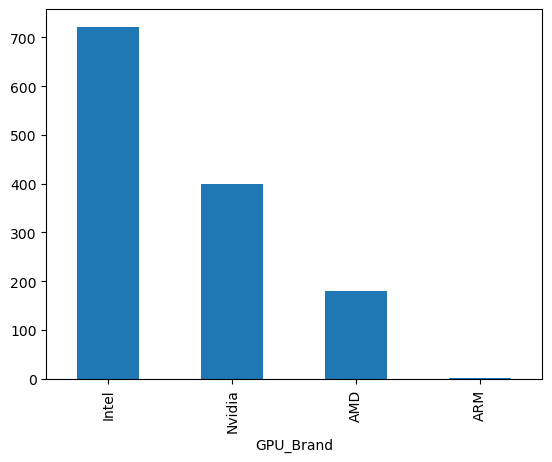

In [79]:
df['GPU_Brand'].value_counts().plot(kind = 'bar')

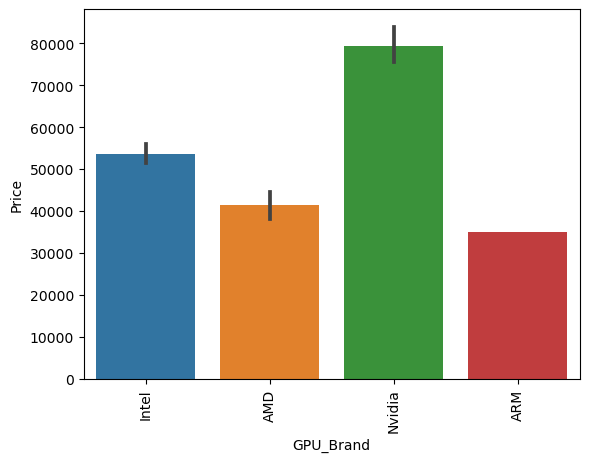

In [80]:
sns.barplot(x=df['GPU_Brand'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [81]:
# Let's drop Gpu column
df.drop(columns=['Gpu'], inplace=True)

In [82]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [83]:
# The below function takes a oeprating system as parameter and returns whether the OS is Windows,
# Mac or Other

def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [84]:
# Let's create a new column OS using the above function
df['OS'] = df['OpSys'].apply(cat_os)

In [85]:
df['OS'].value_counts()

OS
Windows               1125
Others/No OS/Linux     157
Mac                     21
Name: count, dtype: int64

In [86]:
# Let's drop OpSys column
df.drop(columns=['OpSys'], inplace=True)

In [87]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,Hybrid,FlashStorage,GPU_Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128GB SSD,,,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,,,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256GB SSD,,,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512GB SSD,,,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256GB SSD,,,Intel,Mac


In [88]:
# Let's drop Hybrid	, FlashStorage column
df.drop(columns=['Hybrid','FlashStorage'], inplace=True)

In [89]:
df.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,PPI,CPU_Brand,HDD,SSD,GPU_Brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,,128GB SSD,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,,,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,,256GB SSD,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,,512GB SSD,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,,256GB SSD,Intel,Mac


C:\Users\Test\AppData\Local\Temp\ipykernel_12684\3410914685.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])
D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Weight', ylabel='Density'>

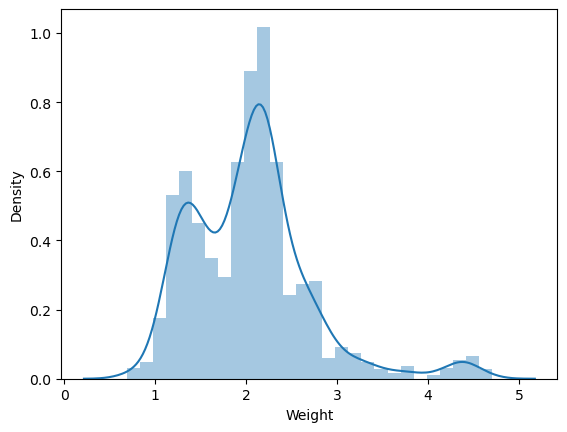

In [90]:
# Let's visualize the frequencies of different weights with a distplot
sns.distplot(df['Weight'])

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Ram          1303 non-null   int32  
 3   Weight       1303 non-null   float32
 4   Price        1303 non-null   float64
 5   TouchScreen  1303 non-null   int64  
 6   IPS          1303 non-null   int64  
 7   PPI          1303 non-null   float64
 8   CPU_Brand    1303 non-null   object 
 9   HDD          1303 non-null   object 
 10  SSD          1303 non-null   object 
 11  GPU_Brand    1303 non-null   object 
 12  OS           1303 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(7)
memory usage: 122.3+ KB


In [92]:
df1 = df[['Ram','Weight','Price','TouchScreen','IPS','PPI']]
df1.head()

,Ram,Weight,Price,TouchScreen,IPS,PPI
0,8,1.37,71378.6832,0,1,226.983005
1,8,1.34,47895.5232,0,0,127.677940
2,8,1.86,30636.0000,0,0,141.211998
3,16,1.83,135195.3360,0,1,220.534624
4,8,1.37,96095.8080,0,1,226.983005


In [93]:
corr_matrix = df1.corr()
corr_matrix

,Ram,Weight,Price,TouchScreen,IPS,PPI
Ram,1.000000,0.383874,0.743007,0.116984,0.206623,0.303763
Weight,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.323240
Price,0.743007,0.210370,1.000000,0.191226,0.252208,0.473487
TouchScreen,0.116984,-0.294620,0.191226,1.000000,0.150512,0.460587
IPS,0.206623,0.016967,0.252208,0.150512,1.000000,0.300879
PPI,0.303763,-0.323240,0.473487,0.460587,0.300879,1.000000


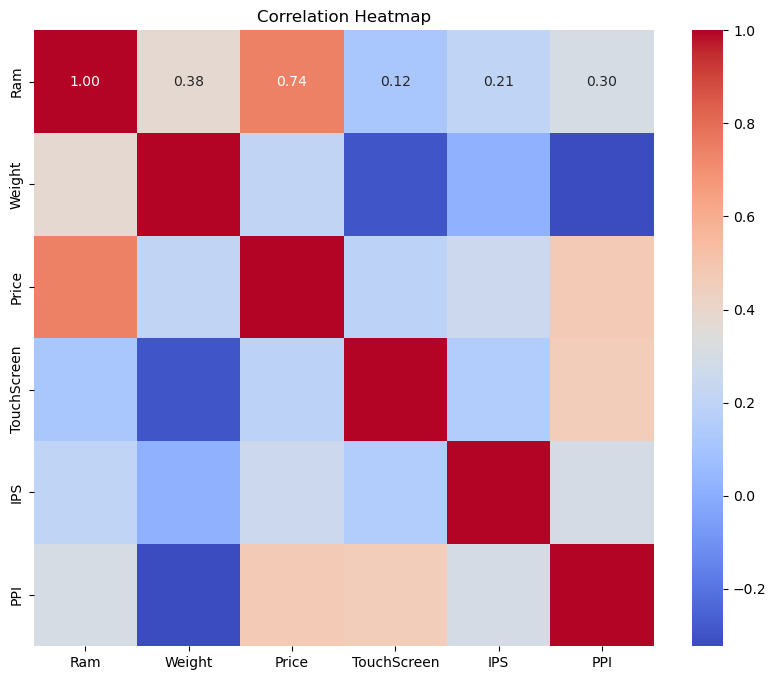

In [94]:
# Let's visualize correlation of different columns with each other using a heatmap
# Plot the heatmap with correlation values
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Test\AppData\Local\Temp\ipykernel_12684\2353505263.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))
D:\Installed\Anaconda\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

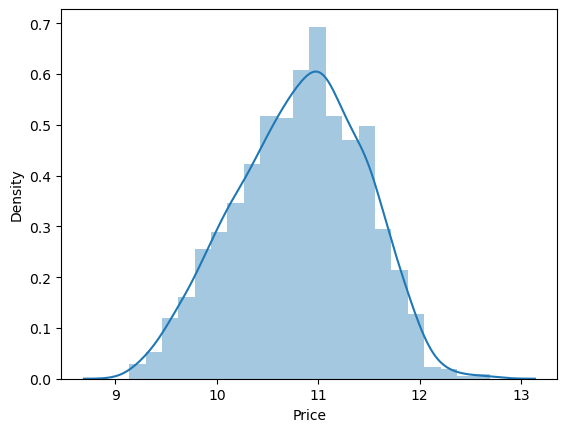

In [95]:
# While using our model we will use logarithm of our price since it is less skewed and 
# more convenient to work with
sns.distplot(np.log(df['Price']))

### Encoding Catagorical Columns

In [97]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

In [98]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.dtypes[df.dtypes!='object'].index
print(cat_cols)
print(num_cols)

Index(['Company', 'TypeName', 'CPU_Brand', 'HDD', 'SSD', 'GPU_Brand', 'OS'], dtype='object')
Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'IPS', 'PPI'], dtype='object')


### Explanation
pd.get_dummies(df, columns=cat_cols, drop_first=True):

pd.get_dummies: This is a function from the Pandas library that converts categorical variable(s) into dummy/indicator variables.

df: The original DataFrame you are working with.

columns=cat_cols: Specifies which columns (categorical variables) you want to convert into dummy variables. cat_cols should be a list of column names that are categorical.

drop_first=True: This parameter ensures that the first category in each categorical variable is dropped. This is done to avoid the dummy variable trap, which is a situation where the dummy variables are highly correlated (multicollinear), leading to issues in regression models.

#### Why Drop the First Category?

Dropping the first category helps to avoid multicollinearity. When you have k categories for a categorical variable, you only need k−1 dummy variables to represent all categories. The dropped category acts as a baseline against which the other categories are compared.

Example
Consider a DataFrame df with a column Color that has three categories: Red, Green, and Blue.

Original DataFrame

Index	Color

0	    Red
1	    Green
2	    Blue
3	    Green
4	    Red
After Applying pd.get_dummies(df, columns=['Color'], drop_first=True)

Index	Color_Green	Color_Blue

0	          0	        0
1	          1	        0
2	          0	        1
3	          1	        0
4	          0	        0

The Color_Red column is dropped because it serves as the baseline.

Each row now has binary indicators for Green and Blue. If both indicators are 0, the color is Red.

In [100]:
df_dum = pd.get_dummies(df,columns=cat_cols,drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

(1303, 60)
Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'IPS', 'PPI', 'Company_Apple',
       'Company_Asus', 'Company_Chuwi', 'Company_Dell', 'Company_Fujitsu',
       'Company_Google', 'Company_HP', 'Company_Huawei', 'Company_LG',
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'TypeName_Gaming',
       'TypeName_Netbook', 'TypeName_Notebook', 'TypeName_Ultrabook',
       'TypeName_Workstation', 'CPU_Brand_Intel Core i3',
       'CPU_Brand_Intel Core i5', 'CPU_Brand_Intel Core i7',
       'CPU_Brand_Other Intel Processor', 'HDD_  1TB HDD', 'HDD_  2TB HDD',
       'HDD_  500GB HDD', 'HDD_128GB HDD', 'HDD_1TB HDD',
       'HDD_1TB HDD  1TB HDD', 'HDD_2TB HDD', 'HDD_32GB HDD', 'HDD_500GB HDD',
       'SSD_128GB SSD', 'SSD_16GB SSD', 'SSD_180GB SSD', 'SSD_1TB SSD',
       'SSD_240GB SSD', 'SSD_256GB SSD', 'SSD_256GB SSD  256GB SSD',
       'SSD_32GB S

In [101]:
df_dum.head()

,Ram,Weight,Price,TouchScreen,IPS,PPI,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,...,SSD_512GB SSD,SSD_512GB SSD 256GB SSD,SSD_512GB SSD 512GB SSD,SSD_64GB SSD,SSD_8GB SSD,GPU_Brand_ARM,GPU_Brand_Intel,GPU_Brand_Nvidia,OS_Others/No OS/Linux,OS_Windows
0,8,1.37,71378.6832,0,1,226.983005,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,8,1.34,47895.5232,0,0,127.677940,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,8,1.86,30636.0000,0,0,141.211998,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,16,1.83,135195.3360,0,1,220.534624,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8,1.37,96095.8080,0,1,226.983005,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


### Step 3. Training the Model

It's finally time to train the model. Here is where all the fun begins! We will first declare our dependent variales and independent variables and then perform regression on the same.

In [103]:
# Let's now seperate the independent variables(features) and the dependent variable(target)
# X --> features
# y --> target

X = df_dum.drop(columns=['Price'])
y = np.log(df['Price'])

In [104]:
X

,Ram,Weight,TouchScreen,IPS,PPI,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,SSD_512GB SSD,SSD_512GB SSD 256GB SSD,SSD_512GB SSD 512GB SSD,SSD_64GB SSD,SSD_8GB SSD,GPU_Brand_ARM,GPU_Brand_Intel,GPU_Brand_Nvidia,OS_Others/No OS/Linux,OS_Windows
0,8,1.37,0,1,226.983005,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,8,1.34,0,0,127.677940,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,8,1.86,0,0,141.211998,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
3,16,1.83,0,1,220.534624,True,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,8,1.37,0,1,226.983005,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1299,16,1.30,1,1,276.053530,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
1300,2,1.50,0,0,111.935204,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
1301,6,2.19,0,0,100.454670,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [105]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1303, dtype: float64

In [106]:
# Let's split the data into X_train, X_test, y_train and y_test
# We will use X_train and y_train to train the model and X_test and y_test to test the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=2)

### Step 4. Testing Different Models

In this section we will test the r2 score and mean absolute scores of different regression models. Since there are so many different regression models available to us, choosing any one model becomes difficult. That's why we will train our data with different regresison models and check which model has the best accuracy and least error

In [108]:
# Importing essential libraries
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

# Importing essential libraries to use different regression models
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [109]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [110]:
def eval_model(y_test,y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = mean_squared_error(y_test,y_pred,squared=False)
    r2s = r2_score(y_test,y_pred)
    return {'MAE':mae,'MSE':mse,'RMSE':rmse}

def model_res(model,X_train,X_test,y_train,y_test,y_pred,mname):
    train_r2 = model.score(X_train,y_train)
    test_r2 = model.score(X_test,y_test)
    w = eval_model(y_test,y_pred)
    res_metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Test_MSE':w['MSE'],
                    'Test_RMSE':w['RMSE'],'Test_MAE':w['MAE']}
    res = pd.DataFrame(res_metrics, index=[mname]) 
    return res, res_metrics

### 4.1 Linear Regression

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It assumes a linear relationship between the variables and estimates the coefficients of the equation that best fits the data. The goal is to find the line of best fit that minimizes the sum of the squared errors between the predicted and actual values.

In [112]:
lr1 = LinearRegression()
lr1.fit(X_train,y_train)

LinearRegression()

In [113]:
ypred_lr1 =  lr1.predict(X_test)

In [114]:
lr1_df,lr1_res = model_res(lr1,X_train,X_test,y_train,y_test,ypred_lr1,'LinReg')
lr1_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
LinReg,0.842654,0.83929,0.061344,0.247678,0.202714


#### 4.2 Ridge Regression

Ridge regression is a regularized form of linear regression that adds a penalty term to the sum of the squared errors, based on the magnitude of the coefficients. This penalty term helps to shrink the coefficients towards zero and reduces the risk of overfitting. Ridge regression is particularly useful when dealing with multicollinearity, a situation where the independent variables are highly correlated. By adding the penalty term, ridge regression can improve the stability and accuracy of the model.

In [116]:
ri = Ridge(alpha=10)
ri.fit(X_train,y_train)

Ridge(alpha=10)

In [117]:
ypred_ri =  ri.predict(X_test)

In [118]:
ri_df,ri_res = model_res(ri,X_train,X_test,y_train,y_test,ypred_ri,'Rid_Reg')
ri_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Rid_Reg,0.826371,0.834619,0.063127,0.251252,0.205031


### 4.3 Lasso Regression

Lasso regression is another form of regularized linear regression that, similar to ridge regression, adds a penalty term to the sum of the squared errors. However, the penalty term used in lasso regression is based on the absolute value of the coefficients, rather than their squared values. This results in a sparser model, where some of the coefficients are forced to be exactly zero. Lasso regression is useful for feature selection, as it can automatically identify and exclude irrelevant or redundant features. Additionally, lasso regression can be used to perform variable selection and reduce the complexity of the model, which can improve its interpretability and generalization performance.

In [120]:
la = Lasso(alpha=0.001)
la.fit(X_train,y_train)

Lasso(alpha=0.001)

In [121]:
ypred_la =  la.predict(X_test)

In [122]:
la_df,la_res = model_res(la,X_train,X_test,y_train,y_test,ypred_la,'Las_Reg')
la_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Las_Reg,0.82673,0.835106,0.062942,0.250882,0.205908


### 4.4 K-Nearest Regression

K-Nearest Neighbors (KNN) regression is a non-parametric method used for regression tasks. KNN regression predicts the value of a new data point by finding the k-nearest training data points and taking the average of their target values. The number of nearest neighbors (k) is a hyperparameter that can be tuned to optimize the model's performance. KNN regression is easy to understand and implement and can capture complex nonlinear relationships between the independent and dependent variables. However, KNN regression can be sensitive to outliers, and the prediction time can be slow for large datasets.

In [124]:
kne = KNeighborsRegressor(n_neighbors=3)
kne.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [125]:
ypred_kne =  kne.predict(X_test)

In [126]:
kne_df,kne_res = model_res(kne,X_train,X_test,y_train,y_test,ypred_kne,'Kne_Reg')
kne_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Kne_Reg,0.922282,0.824606,0.066949,0.258745,0.193231


### 4.5 Decision Tree Regression

Decision tree regression is a non-parametric method used for regression tasks. It builds a tree-like model of decisions and their possible consequences. Each internal node of the tree represents a decision based on one of the features, and each leaf node represents a prediction of the target value. Decision tree regression is easy to understand and interpret, and it can handle both numerical and categorical data. It is also able to capture complex nonlinear relationships between the independent and dependent variables. However, decision tree regression can be prone to overfitting, especially when the tree is deep, and the predictions can be sensitive to small changes in the data. Regularization techniques such as pruning can be used to address these issues.

In [128]:
dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8)

In [129]:
ypred_dtr =  dtr.predict(X_test)

In [130]:
dtr_df,dtr_res = model_res(dtr,X_train,X_test,y_train,y_test,ypred_dtr,'Dtr_Reg')
dtr_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Dtr_Reg,0.91365,0.817678,0.069594,0.263807,0.194664


### 4.6 Support Vector Regression

Support Vector Regression (SVR) is a popular method for regression tasks. It is based on the Support Vector Machine (SVM) algorithm and uses a similar approach to find the hyperplane that best separates the data into different classes. However, in SVR, the goal is to find a hyperplane that best fits the data while allowing some errors. SVR can handle non-linear relationships between the independent and dependent variables by using kernel functions to map the input space into a higher-dimensional space. SVR is effective in handling high-dimensional data and can also handle outliers and noise well. However, SVR can be sensitive to the choice of hyperparameters such as the kernel function and regularization parameter, and the training time can be long for large datasets.

In [132]:
svr = SVR(kernel='rbf',C=10000,epsilon=0.1)
svr.fit(X_train,y_train)

SVR(C=10000)

In [133]:
ypred_svr =  svr.predict(X_test)

In [134]:
svr_df,svr_res = model_res(svr,X_train,X_test,y_train,y_test,ypred_svr,'SVR_Reg')
svr_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
SVR_Reg,0.884055,0.862163,0.052614,0.229377,0.1804


### 4.7 Extra Trees Regression

Extra Trees Regression is an ensemble method for regression tasks that builds multiple decision trees and averages their predictions. It is similar to Random Forest Regression, but in Extra Trees, the decision trees are constructed using random splits on a random subset of features and random thresholds. This randomness leads to a more diverse set of trees, which reduces overfitting and improves the generalization performance. Extra Trees Regression can handle non-linear relationships between the independent and dependent variables, and it is computationally efficient, making it suitable for large datasets. However, it can be difficult to interpret the results and understand the importance of the features.

In [136]:
bootstrap = True
etr = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=None if bootstrap else 0.5,
                              max_features=0.75,
                              max_depth=15)
etr.fit(X_train,y_train)

ExtraTreesRegressor(max_depth=15, max_features=0.75, random_state=3)

In [137]:
ypred_etr =  etr.predict(X_test)

In [138]:
etr_df,etr_res = model_res(etr,X_train,X_test,y_train,y_test,ypred_etr,'ETR_Reg')
etr_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
ETR_Reg,0.988052,0.861924,0.052705,0.229575,0.172215


### 4.8 AdaBoost Regression

AdaBoost Regression is an ensemble method for regression tasks that combines multiple weak learners to create a strong learner. It works by iteratively training a series of weak models on the training data and adjusting the weights of the samples to focus on the samples that are difficult to predict. In each iteration, the model is trained to minimize the error, and the weights of the incorrectly classified samples are increased to ensure they receive more attention in the next iteration. The final model is a weighted average of the weak models, with the weights determined by their performance. AdaBoost Regression can handle non-linear relationships between the independent and dependent variables, and it is computationally efficient. It can also handle noisy data and outliers. However, it can be sensitive to outliers, and the performance can be affected by the choice of weak learner and the number of iterations.

In [140]:
ada = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)
ada.fit(X_train,y_train)

AdaBoostRegressor(n_estimators=15)

In [141]:
ypred_ada =  ada.predict(X_test)

In [142]:
ada_df,ada_res = model_res(ada,X_train,X_test,y_train,y_test,ypred_ada,'Ada_Reg')
ada_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Ada_Reg,0.799393,0.789716,0.080267,0.283314,0.229707


### 4.10 XGB Regression

XGBoost Regression (Extreme Gradient Boosting Regression) is an ensemble method for regression tasks that is based on Gradient Boosting. It uses a similar approach to Gradient Boosting, but with some additional features such as regularized learning and parallel processing to improve the performance and scalability. XGBoost uses a gradient-based optimization algorithm to minimize a loss function, which can be customized depending on the specific regression problem. The final model is a weighted average of the weak models, with the weights determined by their performance. XGBoost can handle non-linear relationships between the independent and dependent variables, and it is robust to outliers and noisy data. It can also automatically select the relevant features and handle missing values. XGBoost is computationally efficient and can handle large datasets. However, it can be sensitive to overfitting, and the performance can be affected by the choice of hyperparameters such as the learning rate, the number of iterations, and the regularization parameters.

In [144]:
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.5, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=45, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [145]:
ypred_xgb =  xgb.predict(X_test)

In [146]:
xgb_df,xgb_res = model_res(xgb,X_train,X_test,y_train,y_test,ypred_xgb,'Xgb_Reg')
xgb_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Xgb_Reg,0.969449,0.891438,0.041439,0.203566,0.156398


### 4.9 Gradient Boost Regresion

Gradient Boosting Regression is an ensemble method for regression tasks that combines multiple weak models to create a strong model. It works by sequentially adding weak models to the ensemble, where each new model is trained to minimize the residual error of the previous model. In each iteration, the model is trained on the negative gradient of the loss function with respect to the predictions, hence the name "gradient boosting". The final model is a weighted average of the weak models, with the weights determined by their performance. Gradient Boosting Regression can handle non-linear relationships between the independent and dependent variables, and it is robust to outliers and noisy data. It can also automatically select the relevant features and handle missing values. However, it can be sensitive to overfitting, and the performance can be affected by the choice of hyperparameters such as the learning rate, the number of iterations, and the maximum depth of the trees.

In [148]:
gbr = GradientBoostingRegressor(n_estimators=500)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=500)

In [149]:
ypred_gbr =  gbr.predict(X_test)

In [150]:
gbr_df,gbr_res = model_res(gbr,X_train,X_test,y_train,y_test,ypred_gbr,'Gbr_Reg')
gbr_df

D:\Installed\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


,Train_R2,Test_R2,Test_MSE,Test_RMSE,Test_MAE
Gbr_Reg,0.956801,0.891939,0.041248,0.203096,0.156522


### Step 5. Exporting the Model

Now since we have trained our model with best regression algorithm, this model needs to be saved in a file, so that it can be used on the go, without having the re-train it again. This can be done with a pyhton library called pickle.

In [152]:
# We will save two files: df.pkl and pipe.pkl
# df.pkl will contain the pandas dataframe(in binary format)
# pipe.pkl will contain the trained model(in binary format)

import pickle

pickle.dump(df_dum, open('df_dum.pkl', 'wb'))
pickle.dump(gbr, open('model.pkl', 'wb'))